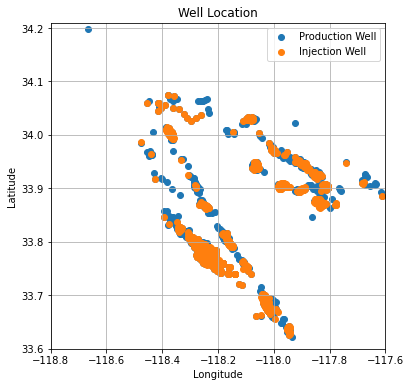

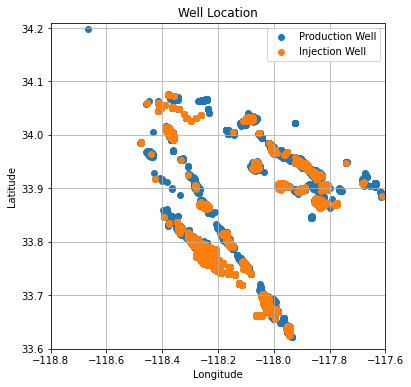

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

def upscale(k,file_path,t,iteration=1000):
    data = pd.read_csv(file_path)
    location = data[['Latitude','Longitude']]
    
    model = KMeans(n_clusters = k, max_iter = iteration)
    model.fit(location)
    r1 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
    r = pd.concat([data, pd.Series(model.labels_, index = location.index)], axis = 1)  #详
    m = r.rename(columns = {0:'label'})
    
    for i in range(k):
        r.loc[r[0]==i,'Latitude'] = r1.at[i,0]
        r.loc[r[0]==i,'Longitude'] = r1.at[i,1]
        
    del r['Well #']
    
    if t == 0:
        f = r.rename(columns = {0:'label'}).groupby(['Production Date','Longitude','Latitude','label']).agg('sum').reset_index()
        return r1,m,f
    if t == 1:
        f = r.rename(columns = {0:'label'}).groupby(['Injection Date','Longitude','Latitude','label']).agg('sum').reset_index()
        return r1,m,f
    return 


def location_plot(data_production,data_injection):
    fig,ax = plt.subplots(figsize=(6,6))
    plt.scatter(data_production.loc[:,1],data_production.loc[:,0])
    plt.scatter(data_injection.loc[:,1],data_injection.loc[:,0])
    plt.grid()
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.xlim([-118.8,-117.6])
    plt.ylim([33.6,34.21])
    plt.title('Well Location')
    plt.legend(['Production Well','Injection Well'])
    plt.show()
    

def process_initial_data(file_path):
    data = pd.read_csv(file_path)
    location_list = pd.DataFrame(data[['Latitude','Longitude']].value_counts().keys().tolist())
    
    return location_list


def main():
    path_pro = './production_2.csv'
    path_inj = './injection_2.csv'
    
    p1,p2,p3 = upscale(1000,path_pro,0)
    i1,i2,i3 = upscale(1000,path_inj,1)
    location_plot(p1,i1)
    p4 = process_initial_data(path_pro)
    i4 = process_initial_data(path_inj)
    location_plot(p4,i4)
    
main()